In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forest-cover-type-prediction/test.csv.zip
/kaggle/input/forest-cover-type-prediction/sampleSubmission.csv
/kaggle/input/forest-cover-type-prediction/sampleSubmission.csv.zip
/kaggle/input/forest-cover-type-prediction/train.csv.zip
/kaggle/input/forest-cover-type-prediction/test.csv
/kaggle/input/forest-cover-type-prediction/test3.csv
/kaggle/input/forest-cover-type-prediction/train.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df1=pd.read_csv('../input/forest-cover-type-prediction/train.csv')
df_test1=pd.read_csv('../input/forest-cover-type-prediction/test.csv')
df_test2=pd.read_csv('../input/forest-cover-type-prediction/test3.csv')
df=df1.copy()
df_test=df_test1.copy()

In [4]:
df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


In [5]:
pd.set_option('display.max_columns',None)
df.drop(columns=['Id','Cover_Type'],inplace=True)
df_test.drop(columns=['Id'],inplace=True)

In [6]:
df_test

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2706,29,19,0,0,2920,210,195,115,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565887,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
565888,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
565889,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
565890,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train=df
Y_train=df1.iloc[:,-1]

In [8]:
X_train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15116,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15117,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15118,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df_test

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2706,29,19,0,0,2920,210,195,115,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565887,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
565888,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
565889,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
565890,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Modelling

In [24]:
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from lightgbm import LGBMClassifier

sns.set(style='white', context='notebook', palette='deep')
kfold = StratifiedKFold(n_splits=10)


## Comparing all models

SVC(random_state=2) crossvalidation score:0.5996031746031746

DecisionTreeClassifier(random_state=2) crossvalidation score:0.7145502645502646

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=2),
                   learning_rate=0.1, random_state=2) crossvalidation score:0.7121031746031746

RandomForestClassifier(random_state=2) crossvalidation score:0.7826058201058201

ExtraTreesClassifier(random_state=2) crossvalidation score:0.7793650793650795

GradientBoostingClassifier(random_state=2) crossvalidation score:0.7217592592592592

MLPClassifier(random_state=2) crossvalidation score:0.5321428571428573

KNeighborsClassifier() crossvalidation score:0.6859788359788359

LogisticRegression(random_state=2) crossvalidation score:0.4494708994708995

LinearDiscriminantAnalysis() crossvalidation score:0.6095238095238095



/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=2, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None) crossvalidation score:0.7689153439153439



/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


LGBMClassifier(random_state=2) crossvalidation score:0.7671957671957672



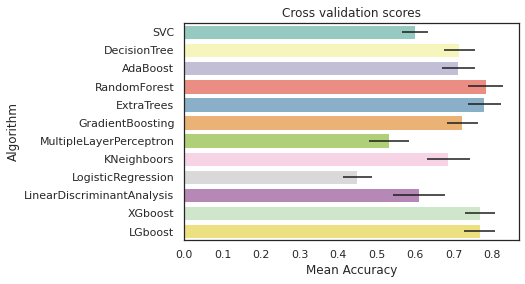

In [25]:

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(random_state = random_state))
classifiers.append(LGBMClassifier(random_state = random_state))

cv_results = []
for classifier in classifiers :
    score=cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=-1)
    cv_results.append(score)
    print('{} crossvalidation score:{}\n'.format(classifier,score.mean()))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis",'XGboost','LGboost']})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


### Best models are random forst,extra trees, xgboost and lgboost

## Random Forest Classifier

In [45]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_train.values,Y_train.values,test_size=0.2)

In [46]:
from sklearn.metrics import accuracy_score
RFC = RandomForestClassifier(random_state=random_state)
RFC.fit(xtrain,ytrain)
ypred=RFC.predict(xtest)
score=cross_val_score(RFC,X_train,Y_train,scoring='accuracy',cv=kfold,n_jobs=-1)

# Best score
print('Crossval score for random forest: {}'.format(score.mean()))
print('Accuracy score for random forest: {}'.format(accuracy_score(ytest,ypred)))

Crossval score for random forest: 0.7826058201058201
Accuracy score for random forest: 0.8538359788359788


## Tuned Random Forest

In [98]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [100]:
from sklearn.metrics import accuracy_score
RFC2 = RandomForestClassifier(random_state=random_state,
                             n_estimators=500,
                             max_depth=32,
                             min_samples_leaf=1,
                             criterion='entropy')
RFC2.fit(xtrain,ytrain)
ypred=RFC2.predict(xtest)
score=cross_val_score(RFC2,X_train,Y_train,scoring='accuracy',cv=kfold,n_jobs=-1)

# Best score
print('Crossval score for random forest: {}'.format(score.mean()))
print('Accuracy score for random forest: {}'.format(accuracy_score(ytest,ypred)))

Crossval score for random forest: 0.7835978835978835
Accuracy score for random forest: 0.8604497354497355


## Extra Trees Classifier

In [47]:
et=ExtraTreesClassifier(random_state=random_state)
et.fit(xtrain,ytrain)
ypred=et.predict(xtest)
score=cross_val_score(et,X_train,Y_train,scoring='accuracy',cv=kfold,n_jobs=-1)

# Best score
print('Crossval score for extra trees classifier: {}'.format(score.mean()))
print('Accuracy score for extra trees classifier: {}'.format(accuracy_score(ytest,ypred)))


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Crossval score for extra trees classifier: 0.7793650793650795
Accuracy score for extra trees classifier: 0.8624338624338624


## Tuned extra trees model

In [66]:
et2=ExtraTreesClassifier()
et2.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [94]:
et2=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=38, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=500,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)
et2.fit(xtrain,ytrain)
ypred=et2.predict(xtest)
score=cross_val_score(et2,X_train,Y_train,scoring='accuracy',cv=kfold,n_jobs=-1)

# Best score
print('Crossval score for extra trees classifier: {}'.format(score.mean()))
print('Accuracy score for extra trees classifier: {}'.format(accuracy_score(ytest,ypred)))

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Crossval score for extra trees classifier: 0.783531746031746
Accuracy score for extra trees classifier: 0.8654100529100529


## LightGb Classifier

In [54]:
lgb2=LGBMClassifier(random_state=random_state)
lgb2.fit(xtrain,ytrain)
ypred=lgb2.predict(xtest)
score=cross_val_score(lgb2,X_train,Y_train,scoring='accuracy',cv=kfold,n_jobs=-1)

# Best score
print('Crossval score for Lightgb classifier: {}'.format(score.mean()))
print('Accuracy score for Lightgb classifier: {}'.format(accuracy_score(ytest,ypred)))

Crossval score for Lightgb classifier: 0.7671957671957672
Accuracy score for Lightgb classifier: 0.8518518518518519


## Tuned LightGB

In [51]:
lgb=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.2, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=200, n_jobs=4, num_leaves=63, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgb.fit(xtrain,ytrain)
ypred=lgb.predict(xtest)
score=cross_val_score(lgb,X_train,Y_train,scoring='accuracy',cv=kfold,n_jobs=-1)

# Best score
print('Crossval score for Lightgb classifier: {}'.format(score.mean()))
print('Accuracy score for Lightgb classifier: {}'.format(accuracy_score(ytest,ypred)))

Crossval score for Lightgb classifier: 0.7927910052910053
Accuracy score for Lightgb classifier: 0.8799603174603174


# ENSEMBLE VOTING CLASSIFIER

In [103]:
vc= VotingClassifier(estimators=[('rfc', RFC2), ('extc', et2),
('lgb',lgb)], voting='soft', n_jobs=-1)
vc.fit(xtrain,ytrain)
ypred=vc.predict(xtest)
score=cross_val_score(vc,X_train,Y_train,scoring='accuracy',cv=kfold,n_jobs=-1)

# Best score
print('Crossval score for Lightgb classifier: {}'.format(score.mean()))
print('Accuracy score for Lightgb classifier: {}'.format(accuracy_score(ytest,ypred)))


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Crossval score for Lightgb classifier: 0.7968915343915344
Accuracy score for Lightgb classifier: 0.8829365079365079


## ENSEMBLE STACKING CLASSIFIER

In [104]:
"""
from sklearn.ensemble import StackingClassifier
estimators = [ ('rf', RFC2),
     ('et', et2)]

sc= StackingClassifier(estimators=estimators, final_estimator=lgb)
sc.fit(xtrain,ytrain)
ypred=sc.predict(xtest)
score=cross_val_score(sc,X_train,Y_train,scoring='accuracy',cv=kfold,n_jobs=-1)

# Best score
print('Crossval score for Lightgb classifier: {}'.format(score.mean()))
print('Accuracy score for Lightgb classifier: {}'.format(accuracy_score(ytest,ypred)))"""

"\nfrom sklearn.ensemble import StackingClassifier\nestimators = [ ('rf', RFC2),\n     ('et', et2)]\n\nsc= StackingClassifier(estimators=estimators, final_estimator=lgb)\nsc.fit(xtrain,ytrain)\nypred=sc.predict(xtest)\nscore=cross_val_score(sc,X_train,Y_train,scoring='accuracy',cv=kfold,n_jobs=-1)\n\n# Best score\nprint('Crossval score for Lightgb classifier: {}'.format(score.mean()))\nprint('Accuracy score for Lightgb classifier: {}'.format(accuracy_score(ytest,ypred)))"

In [105]:
vc.fit(X_train,Y_train)
ypred=vc.predict(df_test.values)

id=df_test1['Id']
dict={'ID':id,'Cover_Type':ypred}
dfsub=pd.DataFrame(dict)
dfsub.to_csv('./submission_ensemblevoting.csv', index=False)

# Hyperparameter tuning of RF And Extratrees

In [97]:
"""
#ExtraTrees 
et2= ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {
 
 
 'criterion': ['gini','entropy'],
 'max_depth':[5,10,25],
 'max_features':[1,3,7],
 'max_samples': [0.2],
 'min_samples_leaf': [1,2,5],
 'min_samples_split': [2,5,7],
 'n_estimators': [100,200,300],
 }


gset = GridSearchCV(et2,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs=-1, verbose = 1)

gset.fit(X_train,Y_train)
gset_best = gset.best_estimator_

# Best score
print(gset.best_score_)
print(gset.best_estimator_)"""


'\n#ExtraTrees \net2= ExtraTreesClassifier()\n\n\n## Search grid for optimal parameters\nex_param_grid = {\n \n \n \'criterion\': [\'gini\',\'entropy\'],\n \'max_depth\':[5,10,25],\n \'max_features\':[1,3,7],\n \'max_samples\': [0.2],\n \'min_samples_leaf\': [1,2,5],\n \'min_samples_split\': [2,5,7],\n \'n_estimators\': [100,200,300],\n }\n\n\ngset = GridSearchCV(et2,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs=-1, verbose = 1)\n\ngset.fit(X_train,Y_train)\ngset_best = gset.best_estimator_\n\n# Best score\nprint(gset.best_score_)\nprint(gset.best_estimator_)'

In [17]:
"""
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

rf_param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_"""

'\n# RFC Parameters tunning \nRFC = RandomForestClassifier()\n\n\n## Search grid for optimal parameters\nrf_param_grid = {"max_depth": [None],\n              "max_features": [1, 3, 10],\n              "min_samples_split": [2, 3, 10],\n              "min_samples_leaf": [1, 3, 10],\n              "bootstrap": [False],\n              "n_estimators" :[100,300],\n              "criterion": ["gini"]}\n\nrf_param_grid = {\n    \'bootstrap\': [True],\n    \'max_depth\': [80, 90, 100, 110],\n    \'max_features\': [2, 3],\n    \'min_samples_leaf\': [3, 4, 5],\n    \'min_samples_split\': [8, 10, 12],\n    \'n_estimators\': [100, 200, 300, 1000]\n}\n\n\ngsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)\n\ngsRFC.fit(X_train,Y_train)\n\nRFC_best = gsRFC.best_estimator_\n\n# Best score\ngsRFC.best_score_'

In [18]:
"""
RFC2 = RandomForestClassifier()
rf_param_grid = {
    'bootstrap': [True],
    'max_depth': [32],
    'max_features': [2],
    'min_samples_leaf': [1],
    'min_samples_split': [6],
    'n_estimators': [300]
}


gsRFC2 = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC2.fit(X_train,Y_train)
gsRFC2.best_score_"""

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   10.3s finished


0.7433201058201058

## Feature Importance

In [19]:
pd.DataFrame(RFC.feature_importances_,
             index=X_train.columns, columns=['Importance']).sort_values(
    by='Importance', ascending=False)[:10]

,Importance
Elevation,0.221876
Horizontal_Distance_To_Roadways,0.091278
Horizontal_Distance_To_Fire_Points,0.073054
Horizontal_Distance_To_Hydrology,0.063471
Vertical_Distance_To_Hydrology,0.054631
Hillshade_9am,0.050407
Aspect,0.050075
Hillshade_3pm,0.047402
Hillshade_Noon,0.044769
Wilderness_Area4,0.044308


In [20]:
pd.DataFrame(et.feature_importances_,
             index=X_train.columns, columns=['Importance']).sort_values(
    by='Importance', ascending=False)[:10]

,Importance
Elevation,0.162795
Horizontal_Distance_To_Roadways,0.079051
Horizontal_Distance_To_Fire_Points,0.066428
Horizontal_Distance_To_Hydrology,0.058940
Wilderness_Area4,0.054962
Vertical_Distance_To_Hydrology,0.050993
Aspect,0.049893
Hillshade_9am,0.049273
Hillshade_3pm,0.046777
Hillshade_Noon,0.045005


# Plotting learning curves

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


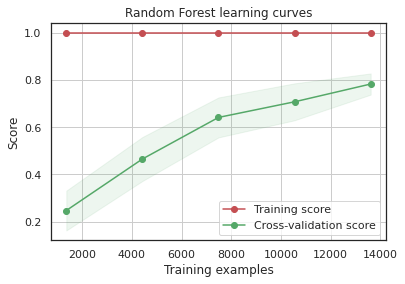

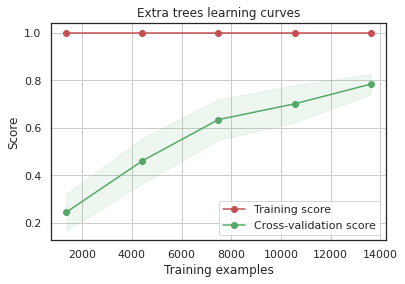

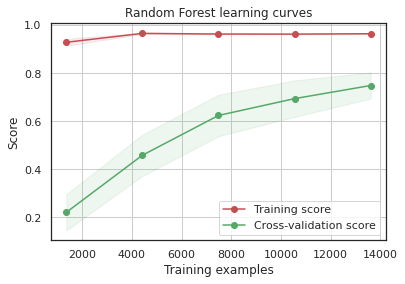

In [21]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(RFC,"Random Forest learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(et,"Extra trees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsRFC2,"Random Forest tuned learning curves",X_train,Y_train,cv=kfold)
#g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)



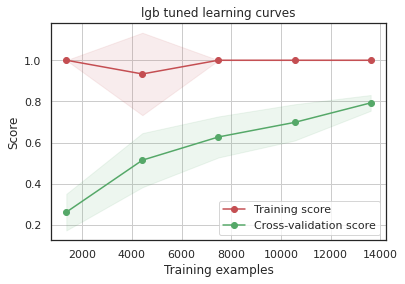

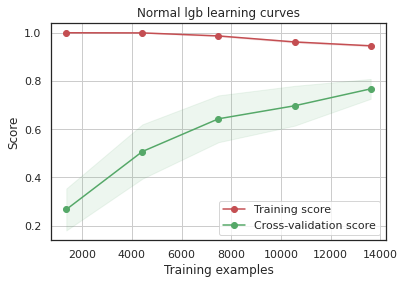

In [56]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(lgb,"lgb tuned learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(lgb2,"Normal lgb learning curves",X_train,Y_train,cv=kfold)

#g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)

In [114]:
#g = plot_learning_curve(vc,"voting classifier learning curves",X_train,Y_train,cv=kfold)

### Both models are little overfitting 

## Submisssion File

In [80]:
gset_best.fit(X_train,Y_train)
ypred=gset_best.predict(df_test.values)

id=df_test1['Id']
dict={'ID':id,'Cover_Type':ypred}
dfsub=pd.DataFrame(dict)
dfsub.to_csv('./submission_gset.csv', index=False)